<a href="https://colab.research.google.com/github/samanthastaheli/cse450_module2/blob/main/LearningModelSingleTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Model Document

## Import Pandas and the Data Set

In [1]:
import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

## One Hot Encode

In [2]:
#campaign_unknown = campaign.replace('unknown', np.nan)
#campaign_drop_unknown = campaign_drop_unknown.dropna()

ml_education = campaign.education.str.replace("basic.4y", '4').str.replace('basic.6y', '6').str.replace('basic.9y', '9').str.replace('high.school', '12').str.replace('professional.course', '14').str.replace('illiterate', '2').str.replace('university.degree', '16').str.replace('unknown', '0').astype('float')

age_bins = [15, 25, 35, 45, 55, 65, 100]
age_labels = ["younger", "young", "middle", "middlish", "old", "older"]

str(age_labels)

ml_age = pd.cut(campaign['age'], bins=age_bins, labels=age_labels).astype(str)

ml_age = pd.get_dummies(ml_age)

ml_answers = campaign.y.str.replace("no", "0").str.replace("yes", '1').astype('float')

ml_pdays = campaign.pdays.replace(999, -1)

ml_onehot = pd.get_dummies(campaign.filter(['job','month','marital', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [3]:
final_ml = pd.concat([ml_onehot, 
                         campaign.filter(['campaign', 'previous',
       'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']),
                         ml_pdays,
                         ml_age,
                         ml_education], axis=1)



final_ml = final_ml.drop("job_student", axis = 1, inplace = False)

## View Dataframe Info

In [4]:
final_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   job_admin.            41188 non-null  uint8  
 1   job_blue-collar       41188 non-null  uint8  
 2   job_entrepreneur      41188 non-null  uint8  
 3   job_housemaid         41188 non-null  uint8  
 4   job_management        41188 non-null  uint8  
 5   job_retired           41188 non-null  uint8  
 6   job_self-employed     41188 non-null  uint8  
 7   job_services          41188 non-null  uint8  
 8   job_technician        41188 non-null  uint8  
 9   job_unemployed        41188 non-null  uint8  
 10  job_unknown           41188 non-null  uint8  
 11  month_apr             41188 non-null  uint8  
 12  month_aug             41188 non-null  uint8  
 13  month_dec             41188 non-null  uint8  
 14  month_jul             41188 non-null  uint8  
 15  month_jun          

## Import Libraries

In [5]:
# Model using poutcome, job, and marital
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

## Select Features for the Training

In [6]:
features = ['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'pdays',
 'middle',
 'middlish',
 'old',
 'older',
 'young',
 'younger',
 'education']

## Drop NA and Prepare X and y

In [7]:
final_ml = final_ml.dropna()
X = pd.get_dummies(final_ml[features], drop_first=True)
y = ml_answers

## Balance the Data Set

In [8]:
from imblearn.over_sampling import RandomOverSampler
ro = RandomOverSampler()
X_new, y_new = ro.fit_resample(X, y)

## Split into the Train and Test sets and Build the Tree


In [9]:
# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.20)

# Build the decision tree
clf = DecisionTreeClassifier(max_depth=9, min_samples_leaf=100)

## Train the Model

In [10]:
# Train it
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=100)

## Test the Model

In [11]:
# Test it 
clf.score(X_test, y_test)

y_predicted = clf.predict(X_test)

## The Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


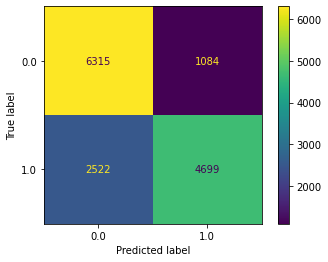

In [12]:
from sklearn import metrics
metrics.plot_confusion_matrix(clf, X_test, y_test)

## View Stats

In [13]:
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.71      0.85      0.78      7399
         1.0       0.81      0.65      0.72      7221

    accuracy                           0.75     14620
   macro avg       0.76      0.75      0.75     14620
weighted avg       0.76      0.75      0.75     14620



## View the Tree

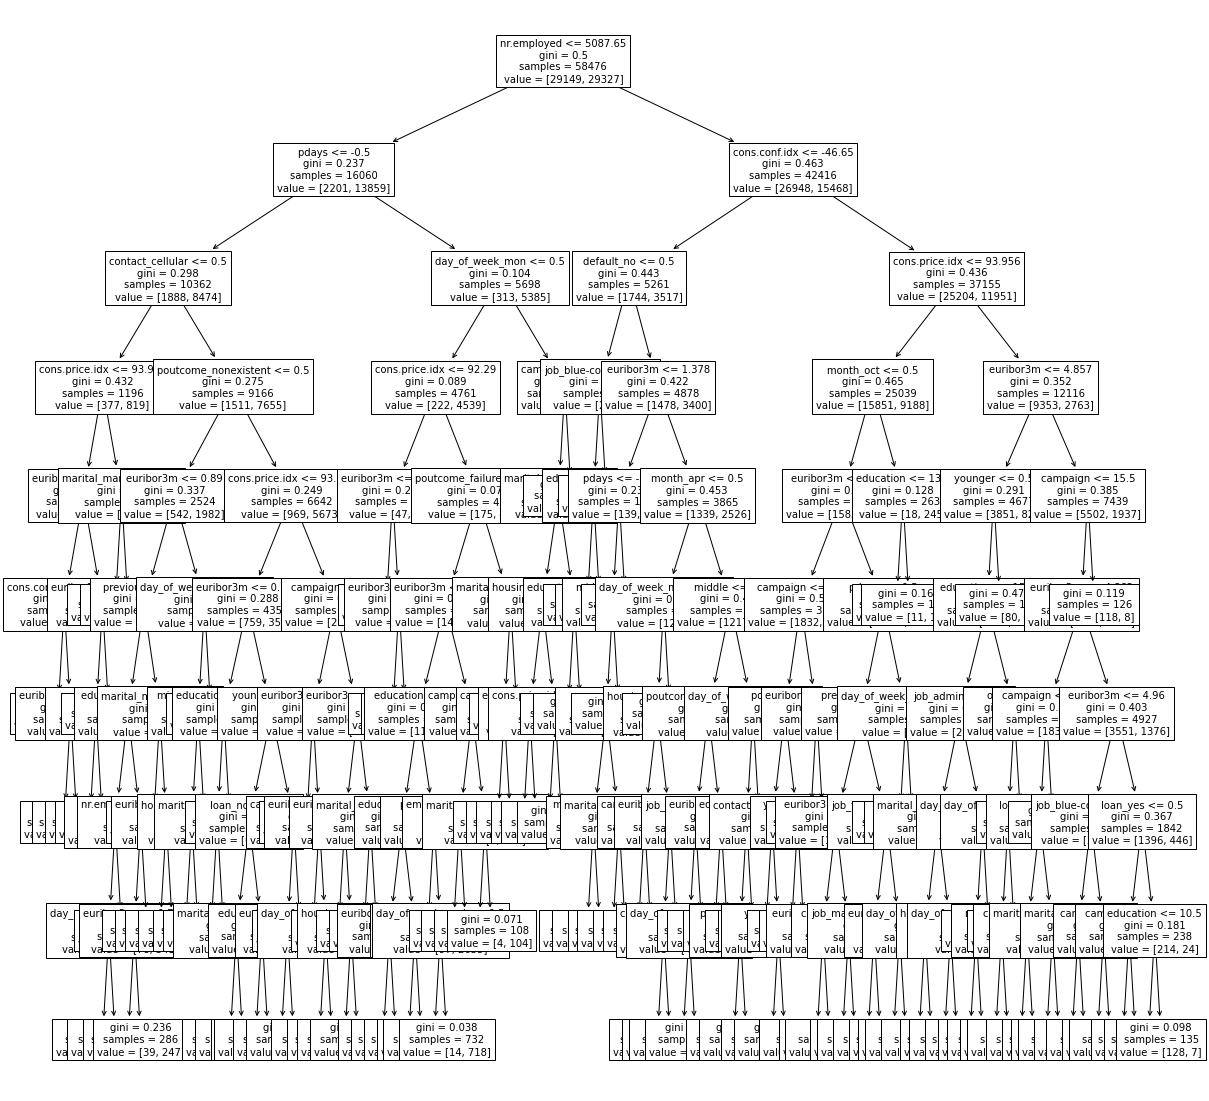

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, fontsize=10, feature_names=X.columns)
plt.show()